# Data Exploration

## 1. Importing Packages and Loading Data

In [4]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [5]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-2.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7780 non-null   int64  
 1   listing_url                                   7780 non-null   object 
 2   scrape_id                                     7780 non-null   int64  
 3   last_scraped                                  7780 non-null   object 
 4   source                                        7780 non-null   object 
 5   name                                          7780 non-null   object 
 6   description                                   7688 non-null   object 
 7   neighborhood_overview                         4683 non-null   object 
 8   picture_url                                   7780 non-null   object 
 9   host_id                                       7780 non-null   i

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.780000e+03,7.780000e+03,7.780000e+03,7779.000000,7779.000000,0.0,7780.000000,7780.000000,7780.000000,5846.000000,...,5910.000000,5909.000000,5910.000000,5909.000000,5909.000000,7780.000000,7780.000000,7780.000000,7780.000000,5910.000000
mean,5.423931e+17,2.025090e+13,1.949055e+08,293.905901,389.589279,NaN,37.770925,-122.429149,3.232005,1.322614,...,4.775068,4.884737,4.865125,4.788201,4.673897,23.398201,10.117995,12.272879,0.042931,1.245953
std,5.626811e+17,2.199360e+00,2.162753e+08,1014.788247,1335.978069,NaN,0.023160,0.026895,2.083062,0.737084,...,0.437412,0.316328,0.349049,0.390806,0.453168,55.423629,31.842264,47.920183,0.488676,1.997823
min,9.580000e+02,2.025090e+13,1.169000e+03,1.000000,1.000000,NaN,37.708480,-122.512460,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.826221e+07,2.025090e+13,1.041522e+07,1.000000,2.000000,NaN,37.755847,-122.441104,2.000000,1.000000,...,4.740000,4.900000,4.880000,4.760000,4.620000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,5.743371e+17,2.025090e+13,9.089162e+07,4.000000,6.000000,NaN,37.776829,-122.421594,2.000000,1.000000,...,4.920000,4.980000,4.980000,4.900000,4.780000,3.000000,1.000000,0.000000,0.000000,0.470000
75%,1.074843e+18,2.025090e+13,3.907730e+08,31.000000,41.000000,NaN,37.788415,-122.410430,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.910000,15.000000,2.000000,3.000000,0.000000,1.660000
max,1.499678e+18,2.025090e+13,7.160698e+08,5445.000000,9551.000000,NaN,37.810940,-122.366040,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,264.000000,188.000000,264.000000,7.000000,49.890000


## 2. Analyzing Missing Data

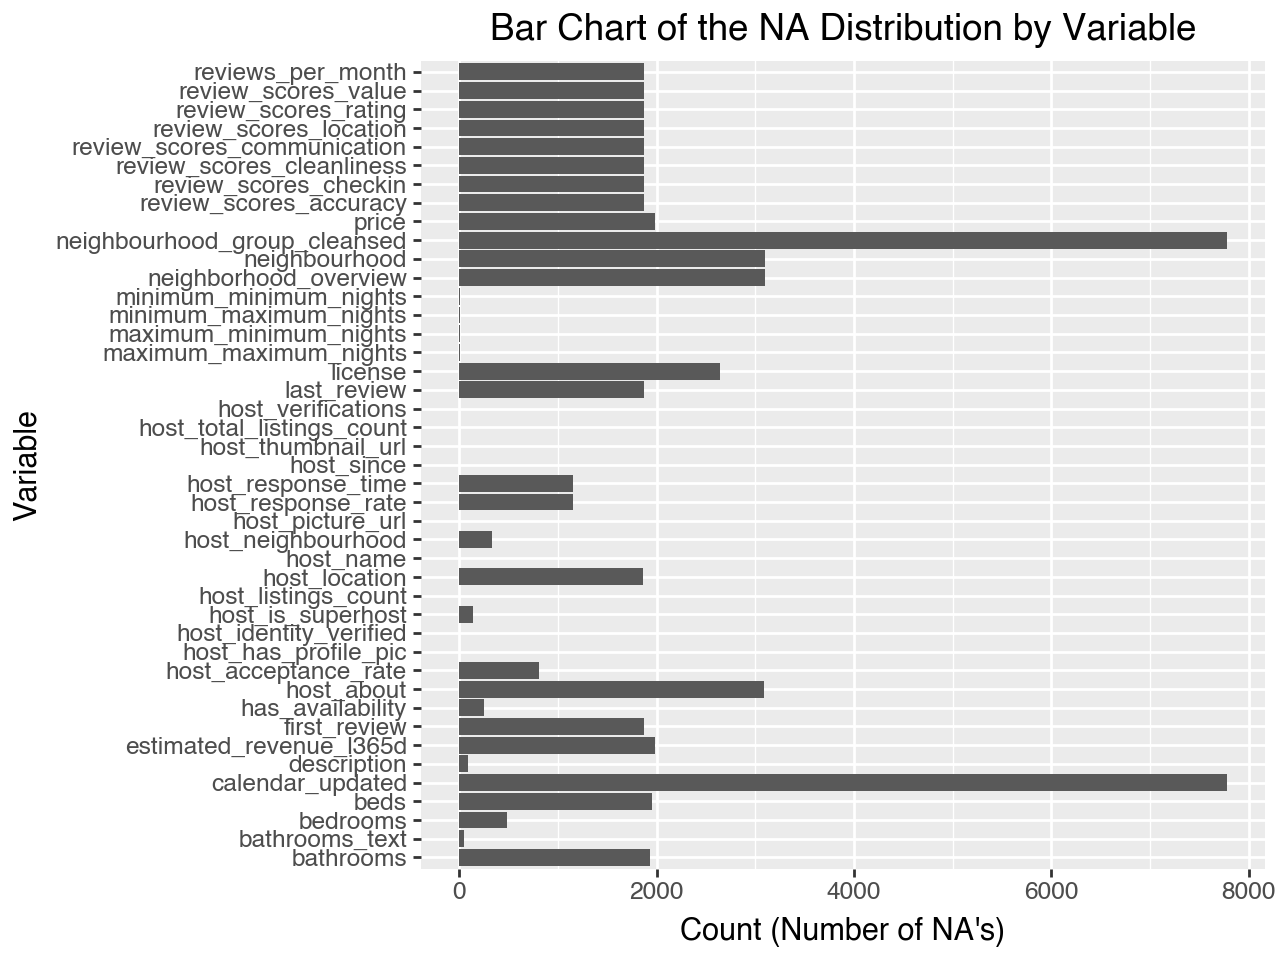

In [7]:
# check for na values

NAs = df.isna().sum().reset_index()
NAs.columns = ["variable", "na_count"]

(
    ggplot(NAs[NAs["na_count"] > 0], mapping = aes(x = "variable", y = "na_count")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Bar Chart of the NA Distribution by Variable",
        x = "Variable",
        y = "Count (Number of NA's)"
    )
)

## 3. Price Analysis (Target Variable)

In [9]:
# drop NA prices (target column, NAs will be useless)

df = df[df["price"].isna() == False].reset_index(drop = True)

# convert price to a float

df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 2494'. Pick better value with 'binwidth'.


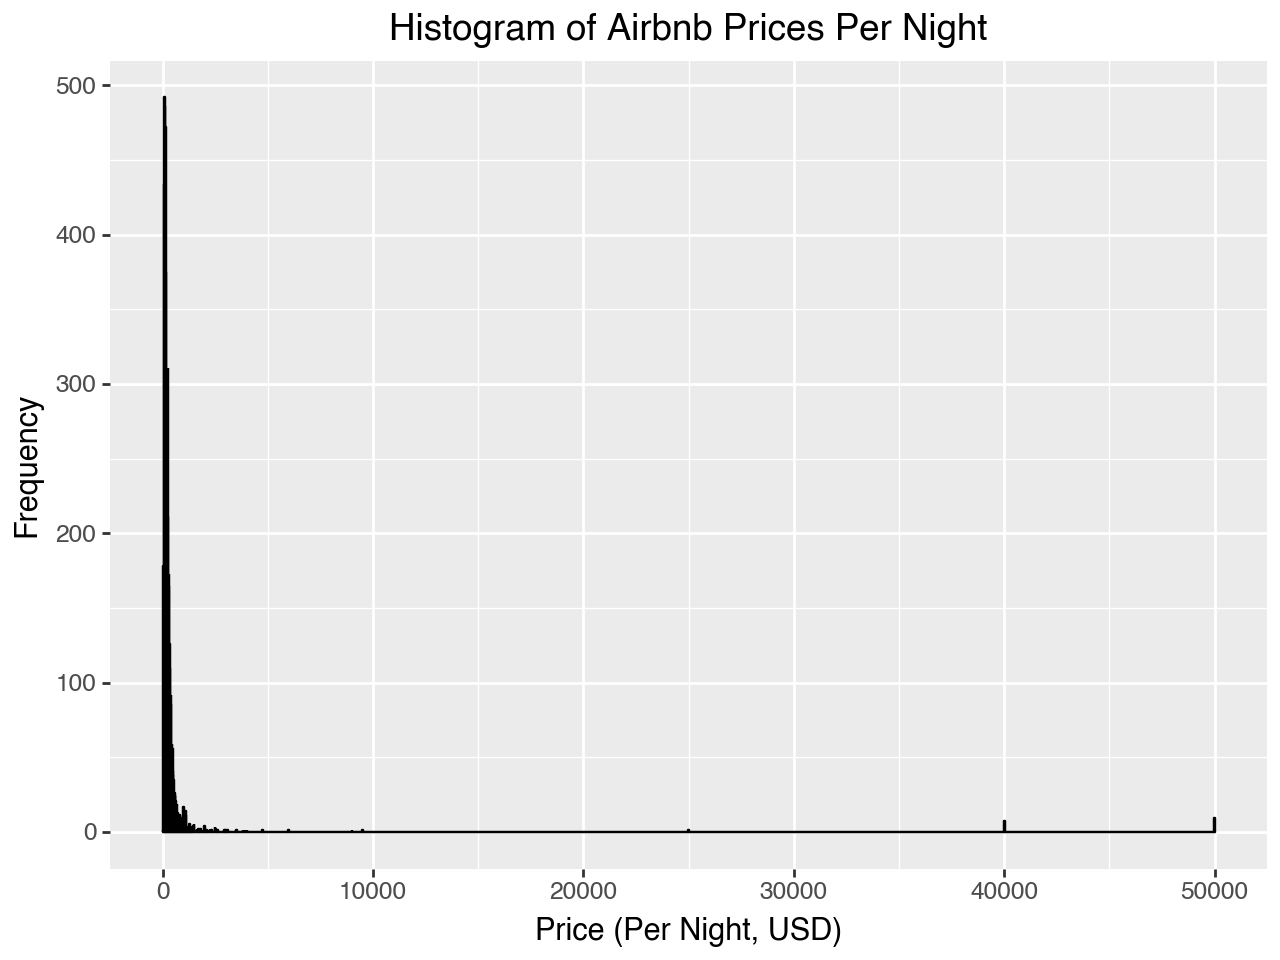

In [10]:
# distribution of the raw price data

(
    ggplot(df, mapping = aes(x = "price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Prices Per Night",
         x = "Price (Per Night, USD)",
         y = "Frequency")
)

In [11]:
# create log price column

df["log_price"] = np.log(df["price"])

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 68'. Pick better value with 'binwidth'.


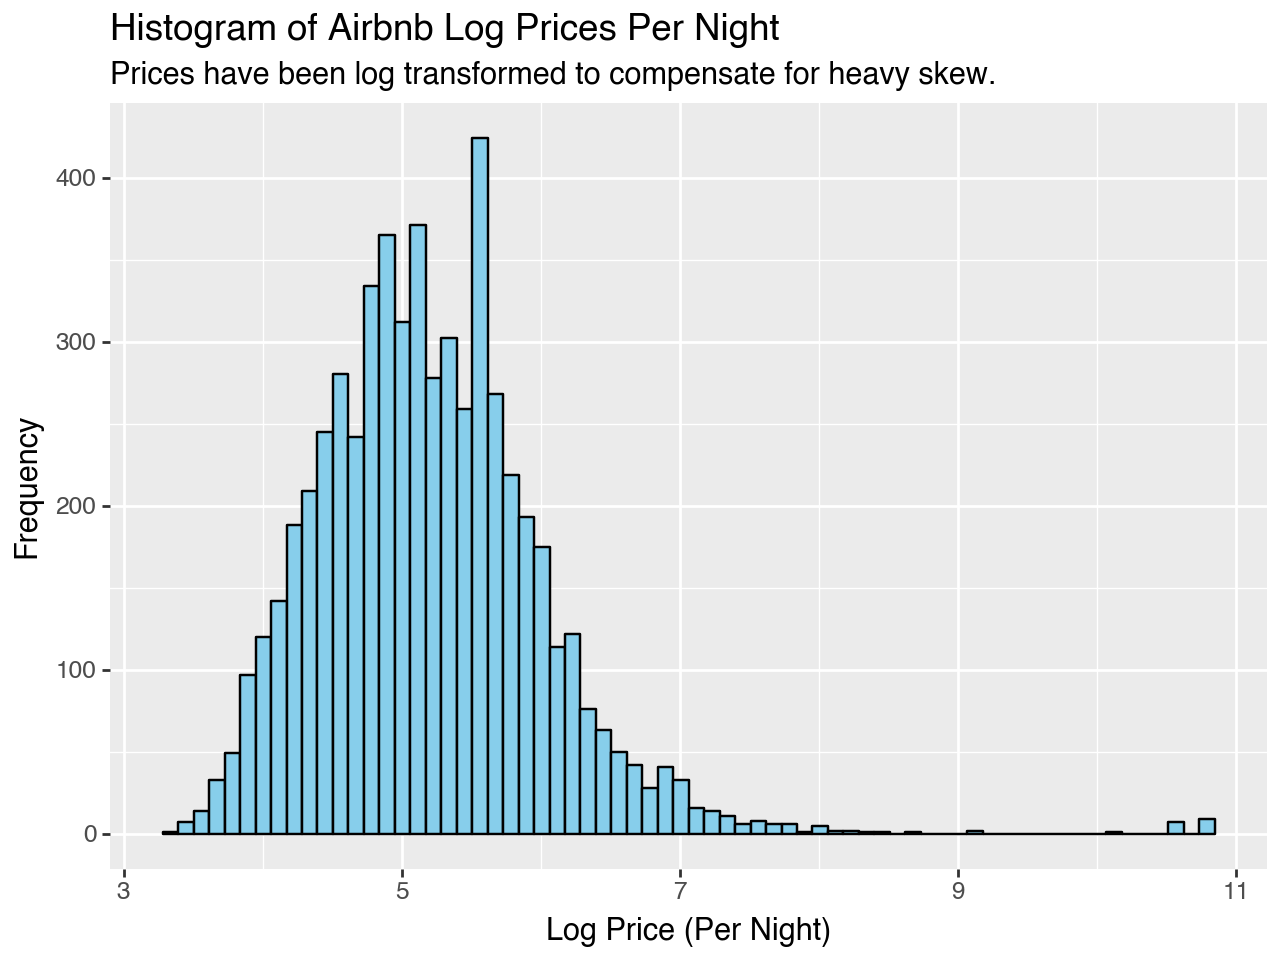

In [12]:
# histogram of log prices (heavy skew in original prices)

(
    ggplot(df, mapping = aes(x = "log_price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Log Prices Per Night",
         subtitle = "Prices have been log transformed to compensate for heavy skew.",
         x = "Log Price (Per Night)",
         y = "Frequency")
)

## 4. Feature Distributions

### Bedrooms

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 32 rows containing non-finite values.


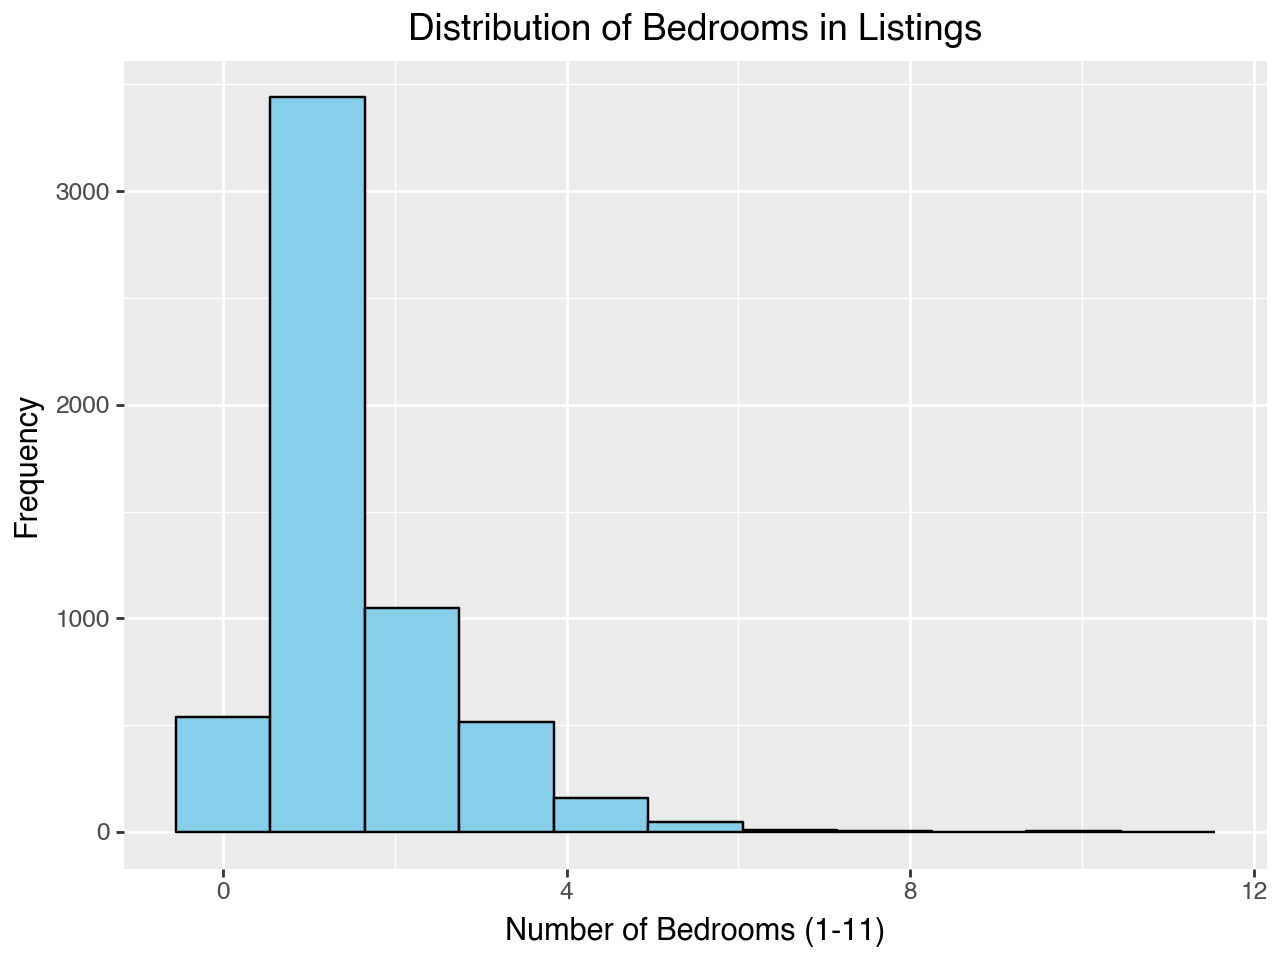

In [15]:
(
    ggplot(df, mapping = aes(x = "bedrooms")) +
    geom_histogram(bins = 11, 
                   fill = "skyblue", 
                   color = "black") +
    labs(
        title = "Distribution of Bedrooms in Listings",
        x = "Number of Bedrooms (1-11)",
        y = "Frequency"
    )
)

In [16]:
df["bedrooms"].describe()

count    5763.000000
mean        1.404997
std         1.002317
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: bedrooms, dtype: float64

In [17]:
df["bedrooms"].value_counts()

bedrooms
1.0     3439
2.0     1050
0.0      536
3.0      514
4.0      160
5.0       40
7.0       11
6.0        7
10.0       3
8.0        2
11.0       1
Name: count, dtype: int64

### Bathrooms

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 5 rows containing non-finite values.


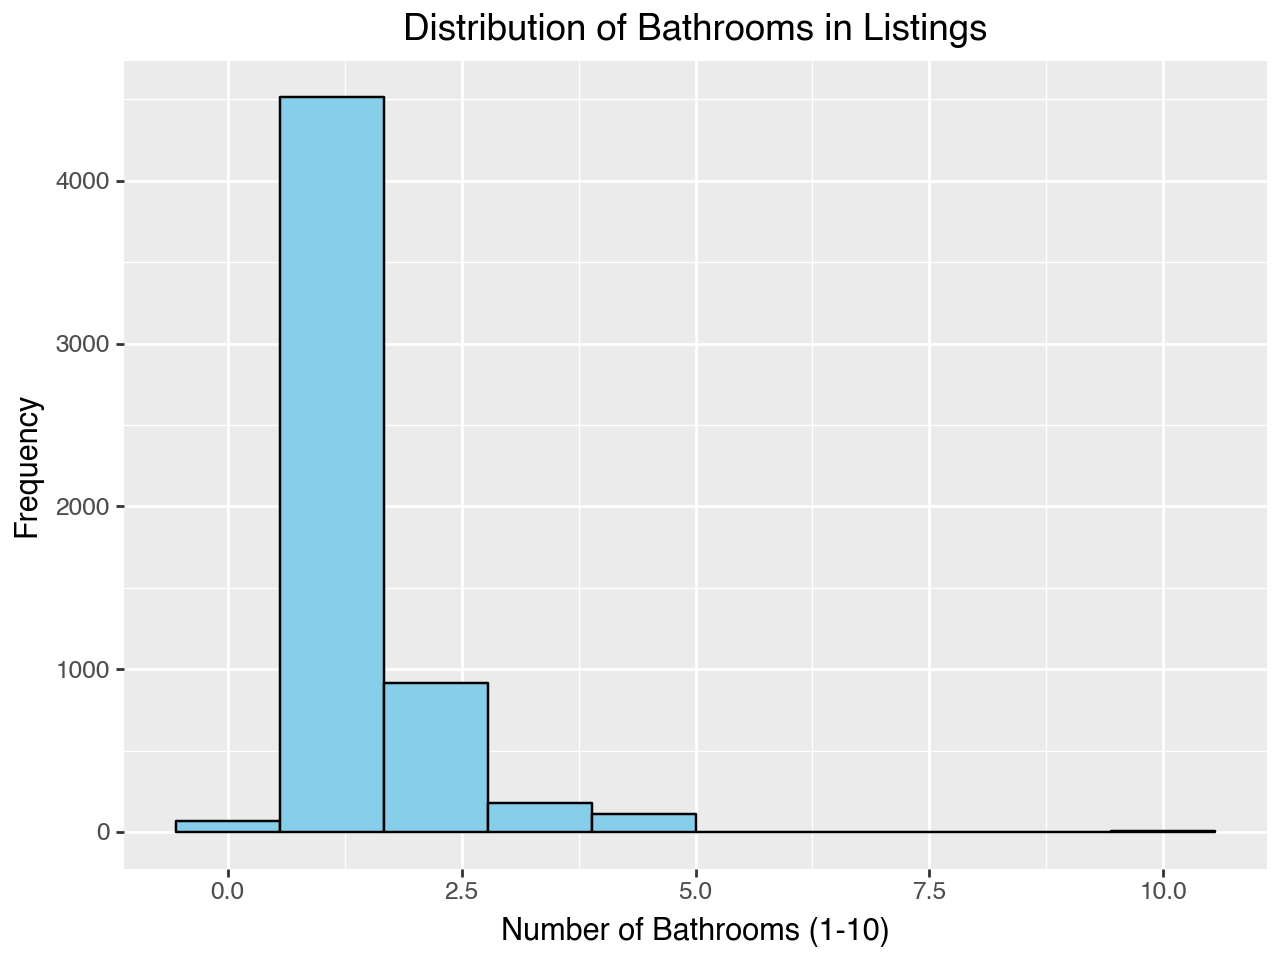

In [19]:
(
    ggplot(df, mapping = aes(x = "bathrooms")) +
    geom_histogram(bins = 10, 
                   fill = "skyblue", 
                   color = "black") +
    labs(
        title = "Distribution of Bathrooms in Listings",
        x = "Number of Bathrooms (1-10)",
        y = "Frequency"
    )
)

In [20]:
df["bathrooms"].describe()

count    5790.000000
mean        1.325734
std         0.739954
min         0.000000
25%         1.000000
50%         1.000000
75%         1.500000
max        10.000000
Name: bathrooms, dtype: float64

In [21]:
df["bathrooms"].value_counts()

bathrooms
1.0     4182
2.0      813
1.5      331
3.0      140
2.5      103
5.0       49
4.0       47
0.0       45
3.5       36
0.5       23
4.5       15
10.0       5
6.0        1
Name: count, dtype: int64

### Accommodates

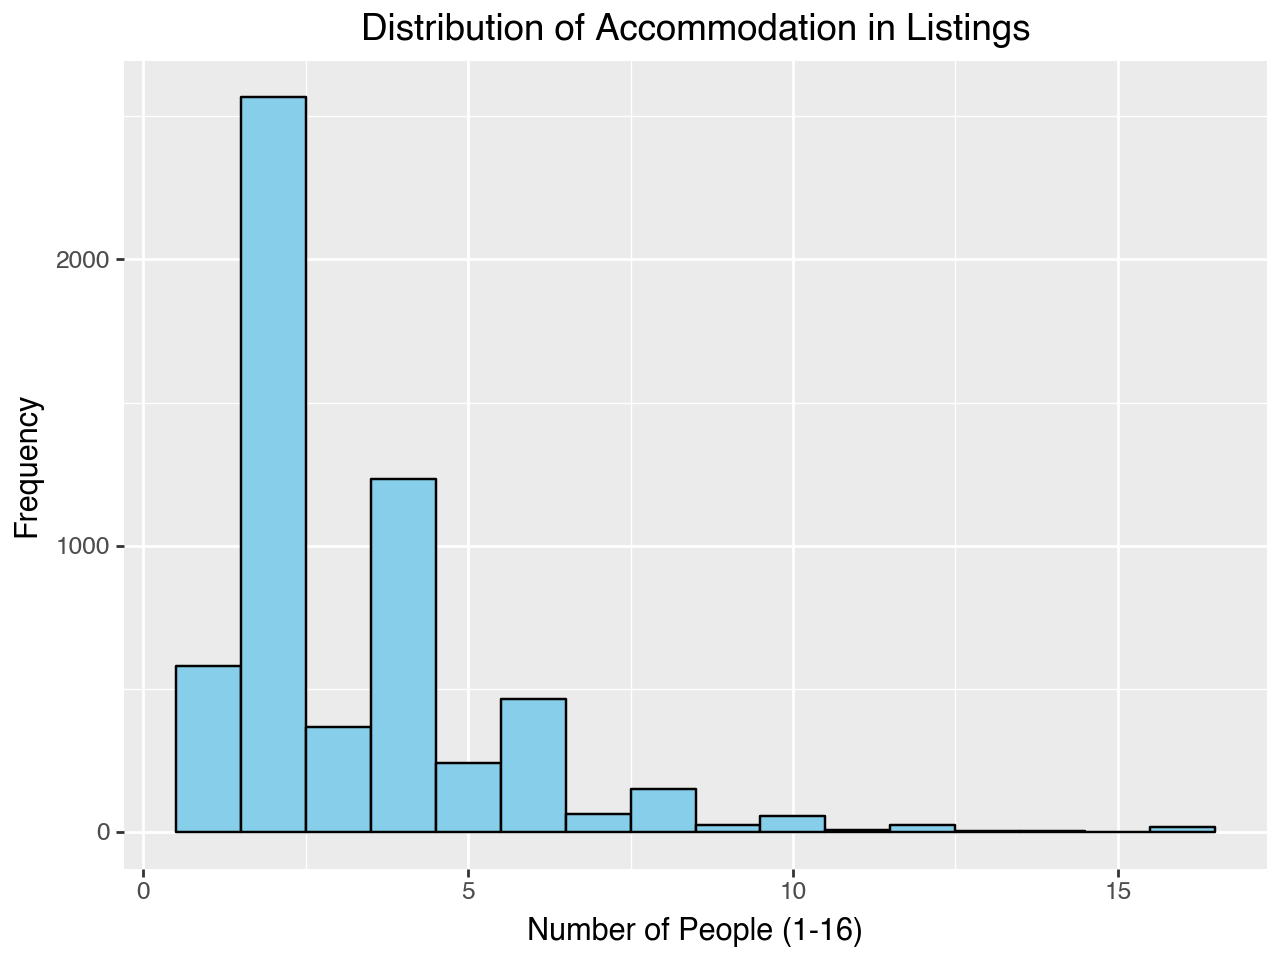

In [23]:
(
    ggplot(df, mapping = aes(x = "accommodates")) +
    geom_histogram(bins = 16, 
                   fill = "skyblue", 
                   color = "black") +
    labs(
        title = "Distribution of Accommodation in Listings",
        x = "Number of People (1-16)",
        y = "Frequency"
    )
)

In [24]:
df["accommodates"].describe()

count    5795.000000
mean        3.254357
std         2.086045
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

In [25]:
df["accommodates"].value_counts()

accommodates
2     2566
4     1234
1      578
6      463
3      367
5      241
8      151
7       63
10      55
9       23
12      23
16      18
11       7
13       3
14       2
15       1
Name: count, dtype: int64

### Property Type

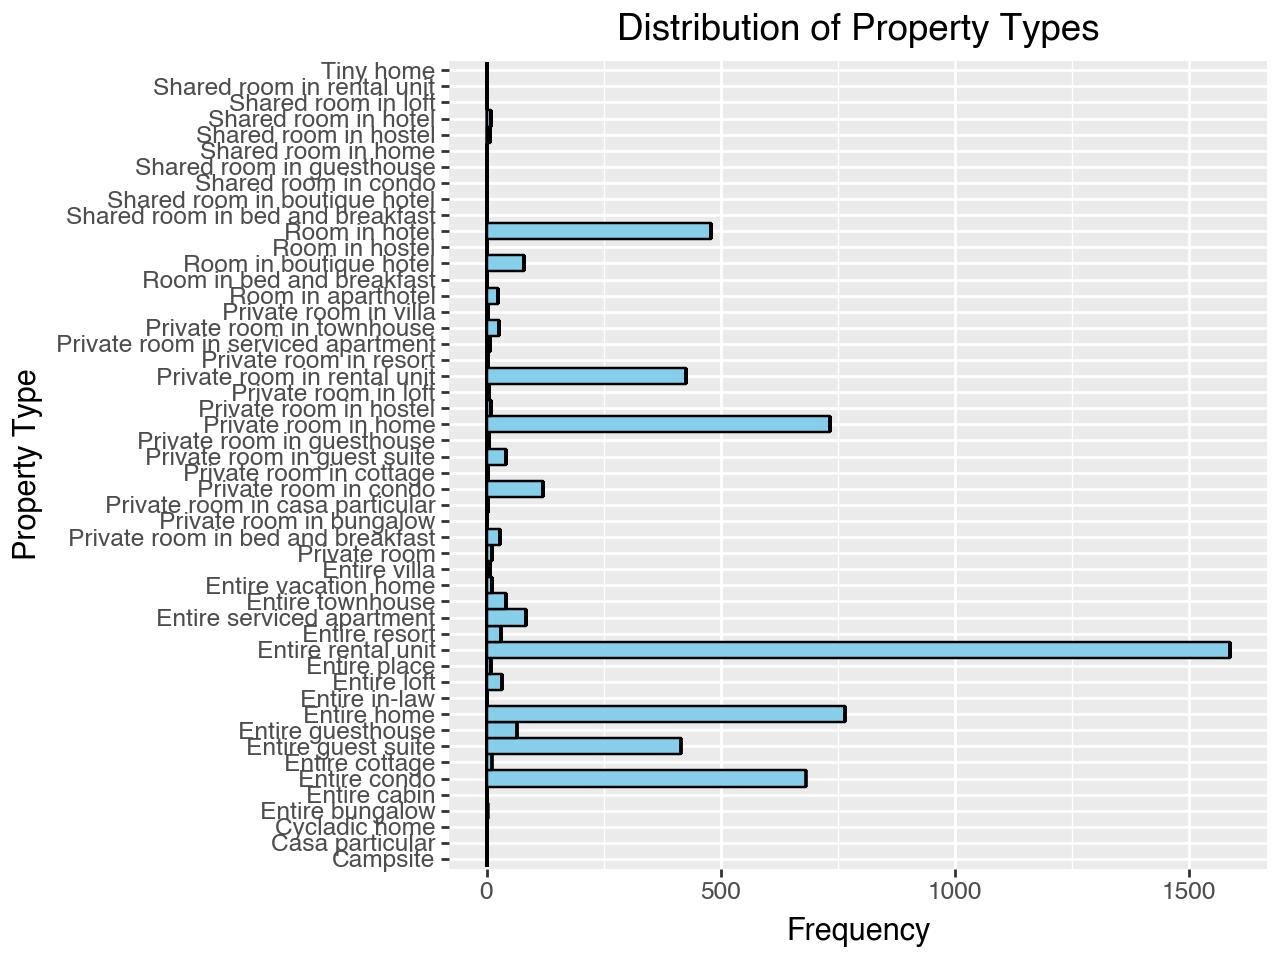

In [27]:
# lots of unique observations

(
    ggplot(df, mapping = aes(x = "property_type")) +
    geom_histogram(bins = 50,
                   fill = "skyblue", 
                   color = "black") +
    coord_flip() + 
    labs(
        title = "Distribution of Property Types",
        x = "Property Type",
        y = "Frequency"
    )
)

In [28]:
df["property_type"].describe()

count                   5795
unique                    50
top       Entire rental unit
freq                    1587
Name: property_type, dtype: object

In [29]:
df["property_type"].value_counts()

property_type
Entire rental unit                    1587
Entire home                            765
Private room in home                   733
Entire condo                           682
Room in hotel                          479
Private room in rental unit            426
Entire guest suite                     415
Private room in condo                  120
Entire serviced apartment               84
Room in boutique hotel                  80
Entire guesthouse                       64
Private room in guest suite             41
Entire townhouse                        41
Entire loft                             34
Entire resort                           31
Private room in bed and breakfast       29
Private room in townhouse               26
Room in aparthotel                      25
Entire cottage                          11
Entire vacation home                    11
Private room                            11
Shared room in hotel                     9
Entire place                            

In [30]:
# Simplifying categories (may want to edit because names overlap with room types)

def simplify_property_type(prop_type):
    prop = str(prop_type).lower()
    if 'apartment' in prop or 'condo' in prop or 'loft' in prop:
        return 'Apartment/Condo'
    elif 'house' in prop or 'townhouse' in prop or 'bungalow' in prop or 'cottage' in prop or 'cabin' in prop:
        return 'House'
    elif 'hotel' in prop or 'hostel' in prop or 'resort' in prop or 'bed and breakfast' in prop:
        return 'Hotel/Hostel'
    elif 'private room' in prop:
        return 'Private Room'
    elif 'shared room' in prop:
        return 'Shared Room'
    elif 'entire' in prop:
        return 'Entire Place'
    else:
        return 'Other'

df['property_type_simple'] = df['property_type'].apply(simplify_property_type)

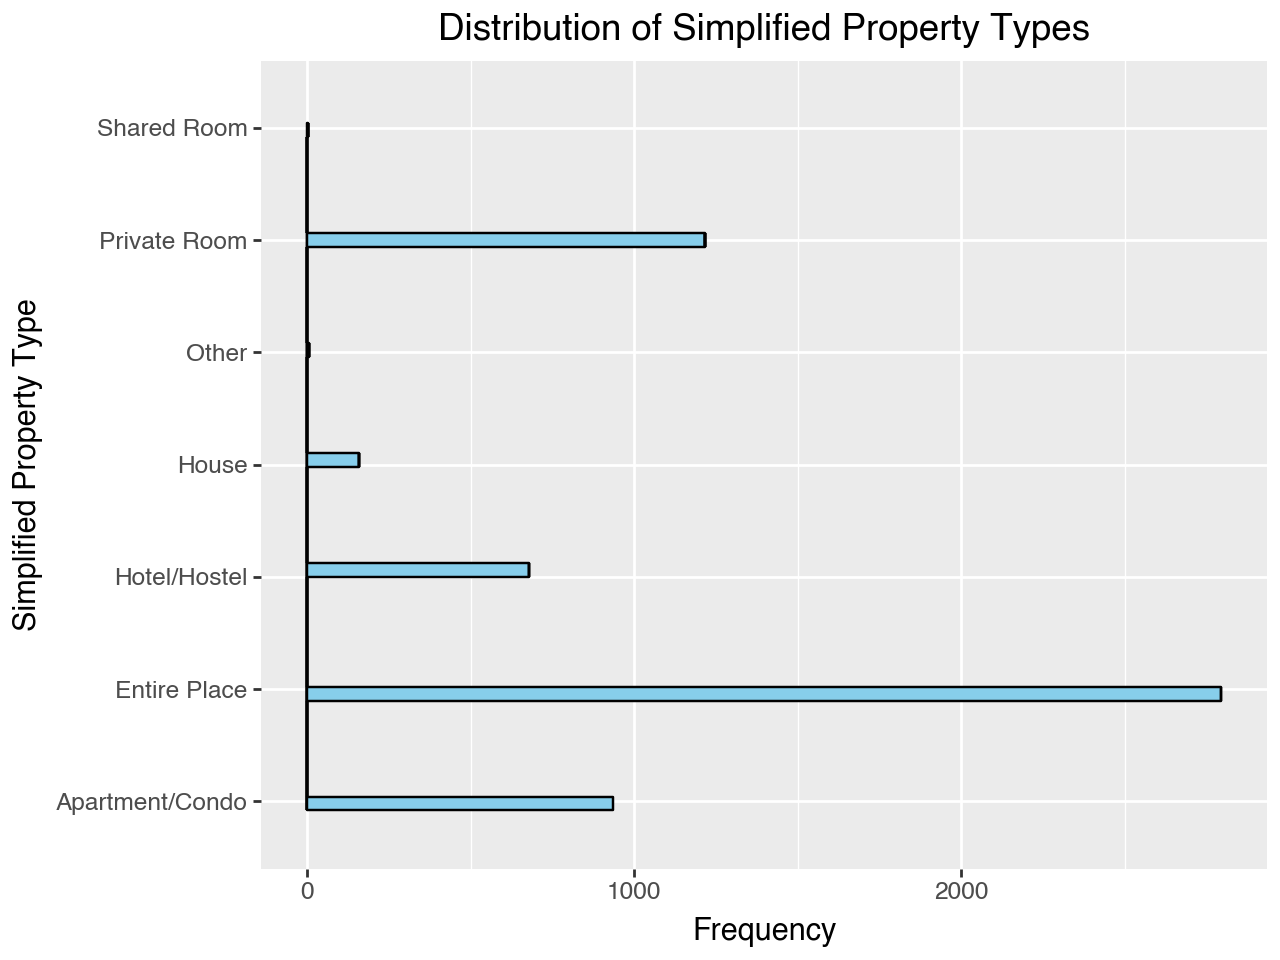

In [31]:
# Cleaner distribution with less categories

(
    ggplot(df, mapping = aes(x = "property_type_simple")) +
    geom_histogram(bins = 50,
                   fill = "skyblue", 
                   color = "black") +
    coord_flip() + 
    labs(
        title = "Distribution of Simplified Property Types",
        x = "Simplified Property Type",
        y = "Frequency"
    )
)

### Room Type

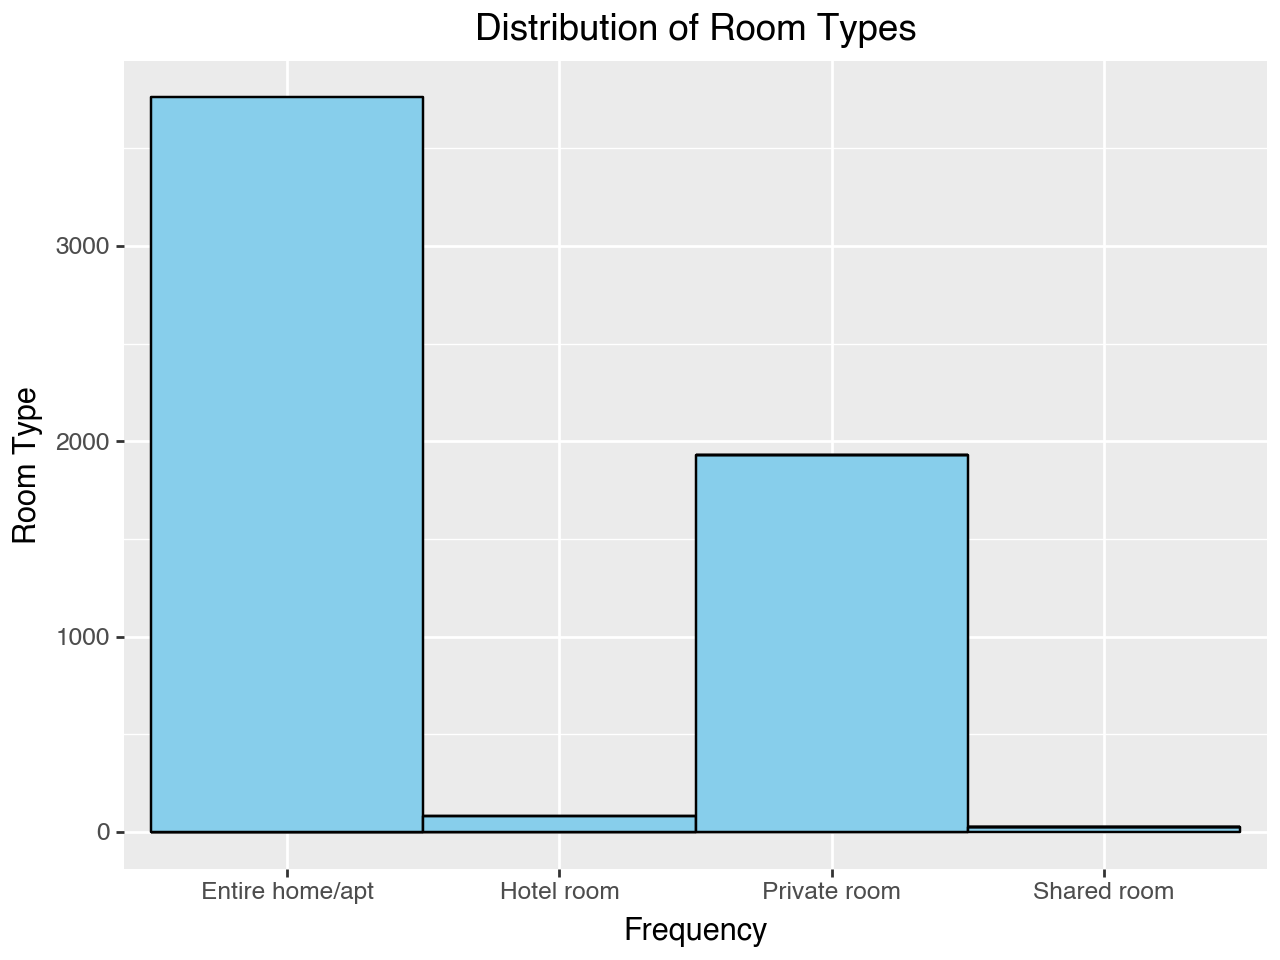

In [33]:
(
    ggplot(df, mapping = aes(x = "room_type")) +
    geom_histogram(bins = 4, 
                   fill = "skyblue", 
                   color = "black") + 
    labs(
        title = "Distribution of Room Types",
        x = "Frequency",
        y = "Room Type"
    )
)

In [34]:
df["room_type"].describe()

count                5795
unique                  4
top       Entire home/apt
freq                 3761
Name: room_type, dtype: object

In [35]:
df["room_type"].value_counts()

room_type
Entire home/apt    3761
Private room       1928
Hotel room           79
Shared room          27
Name: count, dtype: int64

### Neighborhood

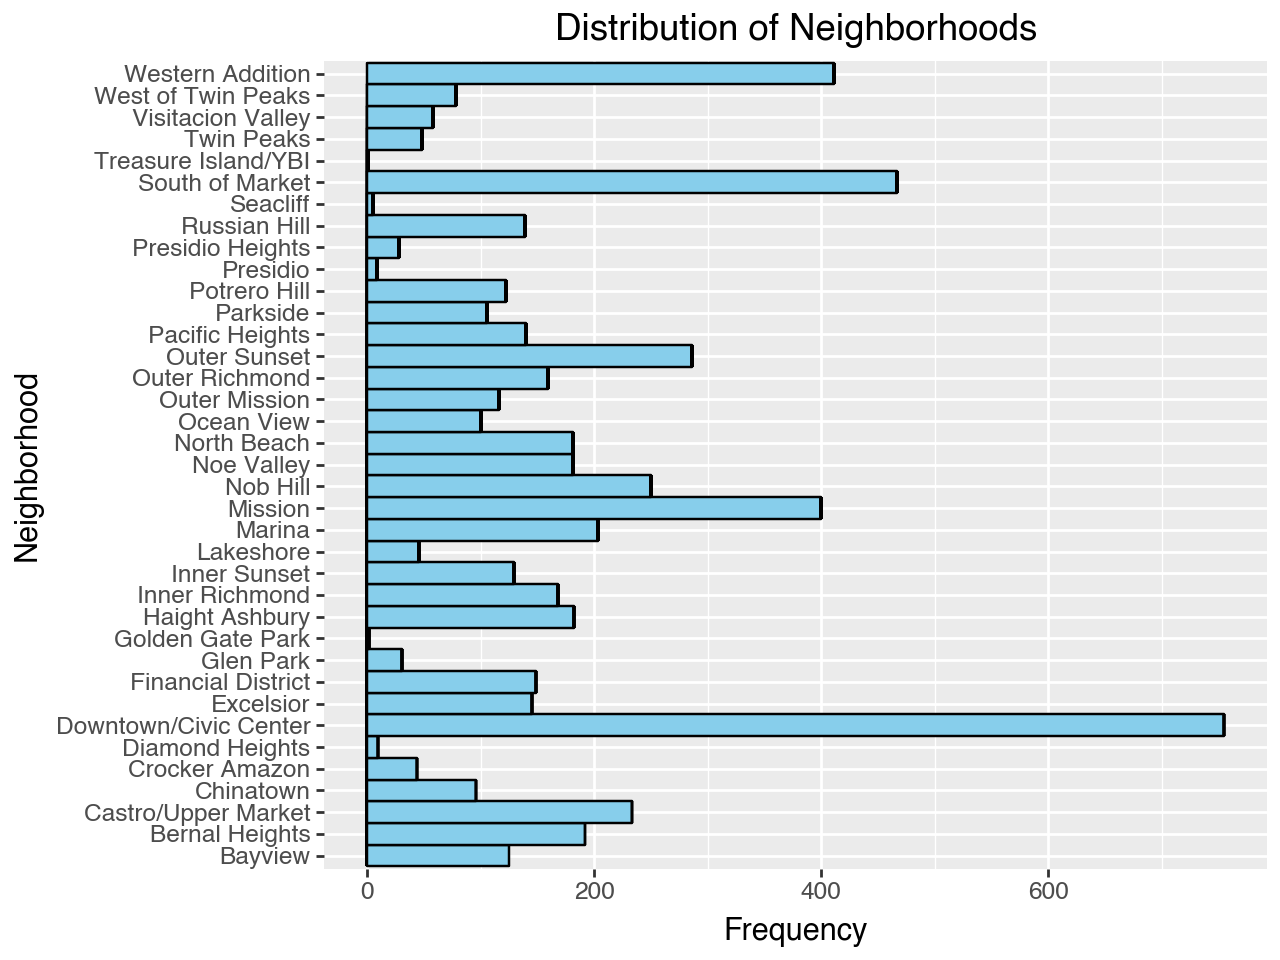

In [37]:
(
    ggplot(df, mapping = aes(x = "neighbourhood_cleansed")) +
    geom_histogram(bins = 37,
                   fill = "skyblue", 
                   color = "black") +
    coord_flip() + 
    labs(
        title = "Distribution of Neighborhoods",
        x = "Neighborhood",
        y = "Frequency"
    )
)

In [38]:
df["neighbourhood_cleansed"].describe()

count                      5795
unique                       37
top       Downtown/Civic Center
freq                        755
Name: neighbourhood_cleansed, dtype: object

In [39]:
df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Downtown/Civic Center    755
South of Market          467
Western Addition         411
Mission                  400
Outer Sunset             286
Nob Hill                 250
Castro/Upper Market      233
Marina                   203
Bernal Heights           192
Haight Ashbury           182
North Beach              181
Noe Valley               181
Inner Richmond           168
Outer Richmond           159
Financial District       149
Excelsior                145
Pacific Heights          140
Russian Hill             139
Inner Sunset             129
Bayview                  125
Potrero Hill             122
Outer Mission            116
Parkside                 106
Ocean View               100
Chinatown                 96
West of Twin Peaks        78
Visitacion Valley         58
Twin Peaks                48
Lakeshore                 46
Crocker Amazon            44
Glen Park                 31
Presidio Heights          28
Diamond Heights           10
Presidio            

## 5. Relationships With Price

### Bedroom

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 32 rows containing non-finite values.


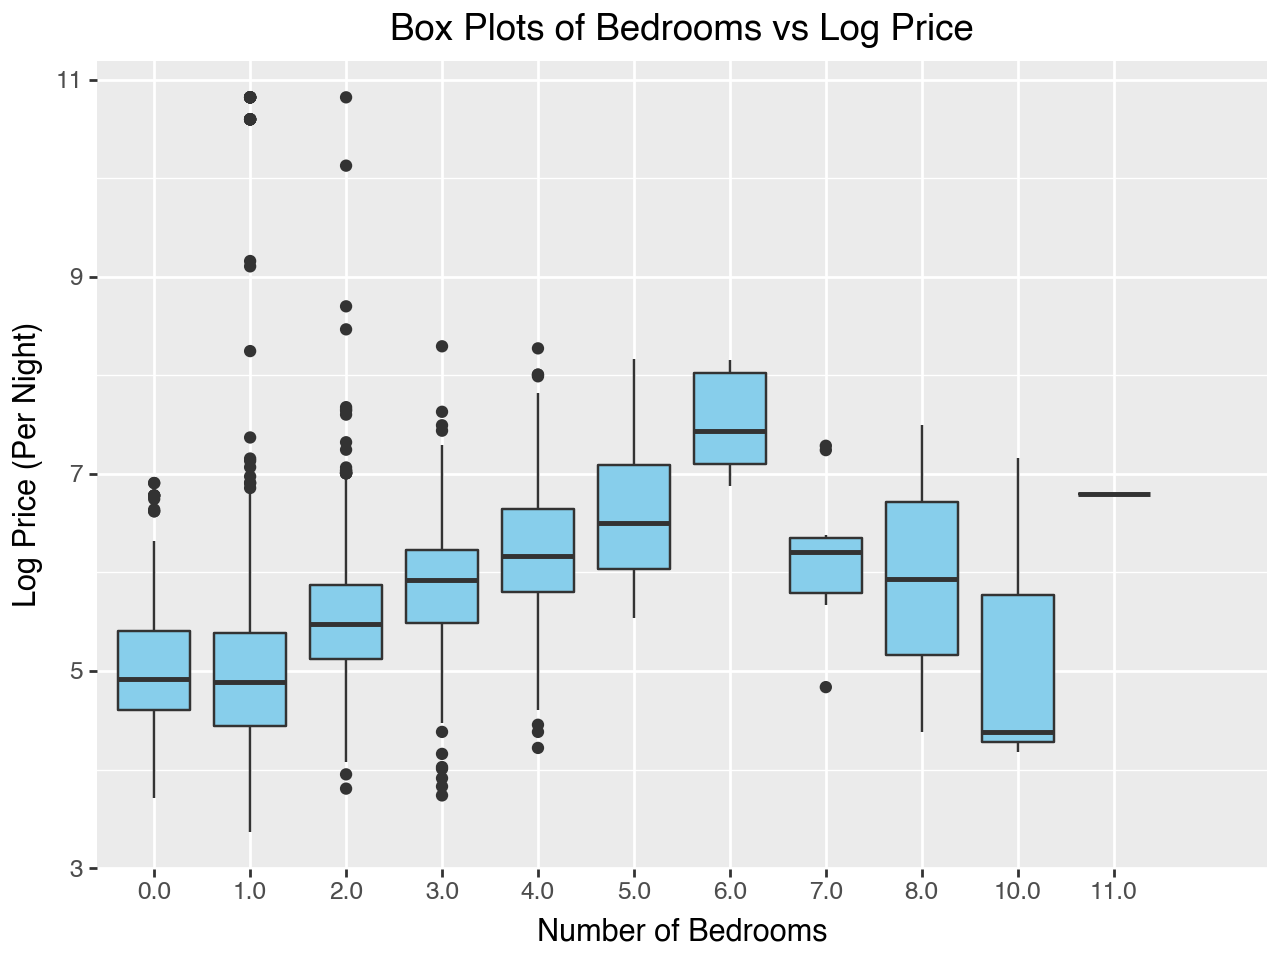

In [42]:
(
    ggplot(df, mapping = aes(x = "factor(bedrooms)", y = "log_price")) +
    geom_boxplot(fill = "skyblue") +
    labs(
        title = "Box Plots of Bedrooms vs Log Price",
        x = "Number of Bedrooms",
        y = "Log Price (Per Night)"
    )
)

In [43]:
pd.DataFrame({"Count": df.groupby("bedrooms")["price"].count(),
              "Mean Price": df.groupby("bedrooms")["price"].mean(),
             "Median Price": df.groupby("bedrooms")["price"].median()})

,Count,Mean Price,Median Price
bedrooms,,,
0.0,536,179.141791,137.0
1.0,3439,369.734225,133.0
2.0,1050,386.095238,240.0
3.0,514,432.809339,373.0
4.0,160,650.975000,477.0
5.0,40,963.800000,669.5
6.0,7,2099.857143,1696.0
7.0,11,592.000000,495.0
8.0,2,937.500000,937.5


### Bathrooms

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 5 rows containing non-finite values.


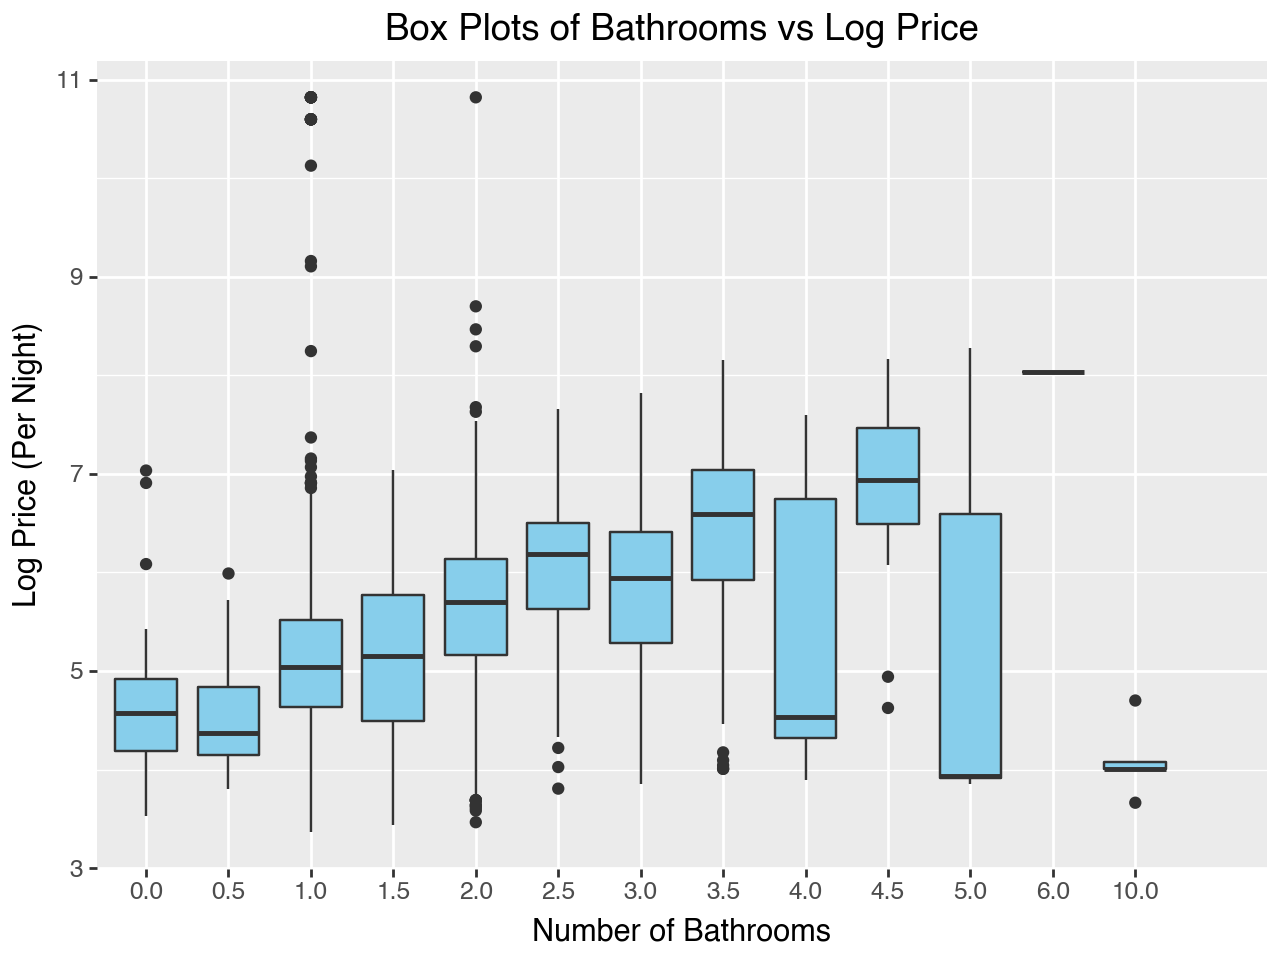

In [45]:
(
    ggplot(df, mapping = aes(x = "factor(bathrooms)", y = "log_price")) +
    geom_boxplot(fill = "skyblue") +
    labs(
        title = "Box Plots of Bathrooms vs Log Price",
        x = "Number of Bathrooms",
        y = "Log Price (Per Night)"
    )
)

In [46]:
pd.DataFrame({"Count": df.groupby("bathrooms")["price"].count(),
              "Mean Price": df.groupby("bathrooms")["price"].mean(),
             "Median Price": df.groupby("bathrooms")["price"].median()})

,Count,Mean Price,Median Price
bathrooms,,,
0.0,45,150.911111,97.0
0.5,23,121.347826,79.0
1.0,4182,361.556432,154.0
1.5,331,235.555891,172.0
2.0,813,436.821648,299.0
2.5,103,561.291262,487.0
3.0,140,525.771429,381.5
3.5,36,882.000000,733.5
4.0,47,479.574468,93.0


### Accomodates

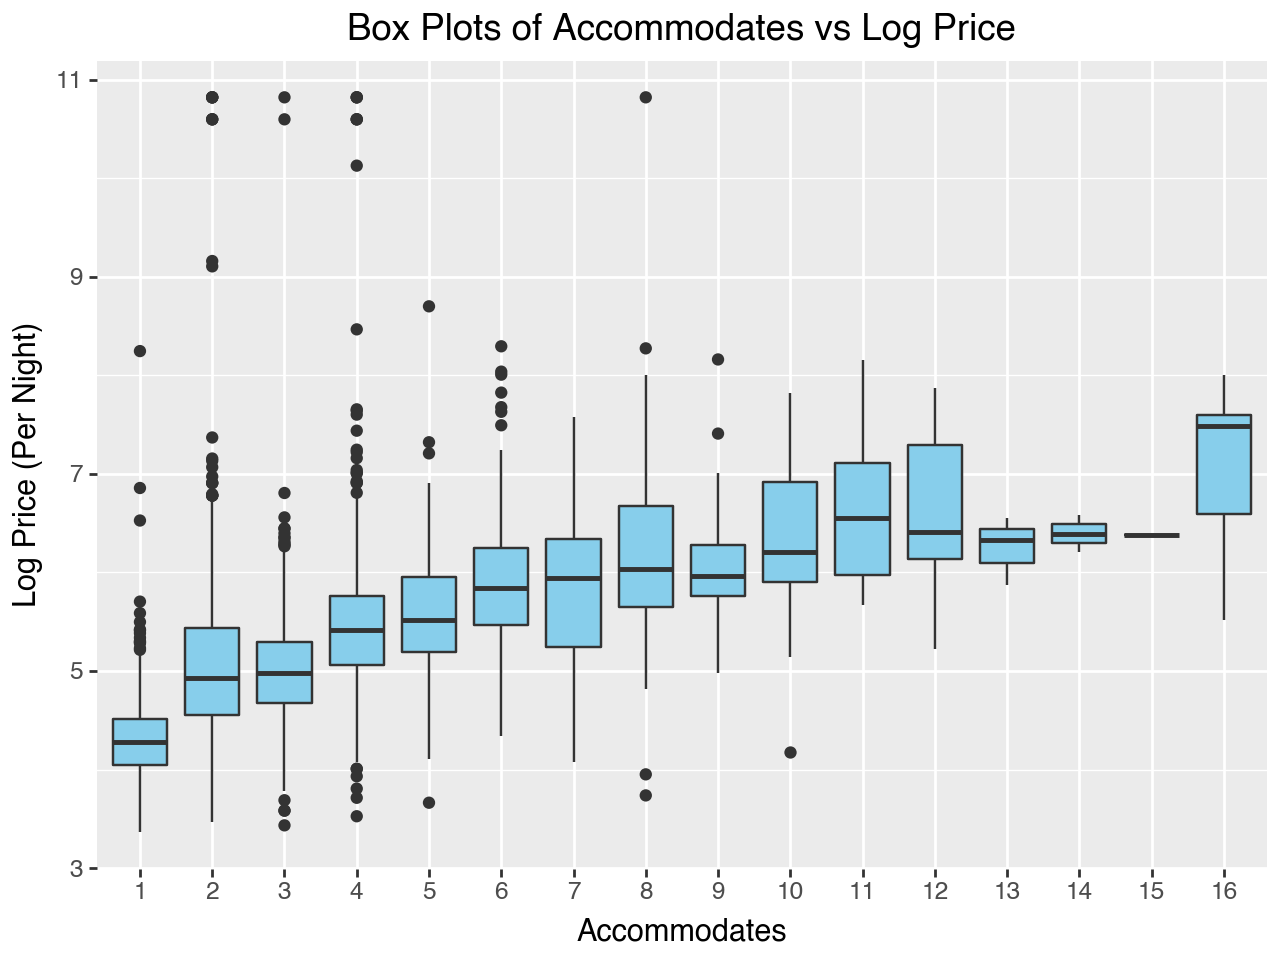

In [48]:
(
    ggplot(df, mapping = aes(x = "factor(accommodates)", y = "log_price")) +
    geom_boxplot(fill = "skyblue") +
    labs(
        title = "Box Plots of Accommodates vs Log Price",
        x = "Accommodates",
        y = "Log Price (Per Night)"
    )
)

In [49]:
pd.DataFrame({"Count": df.groupby("accommodates")["price"].count(),
              "Mean Price": df.groupby("accommodates")["price"].mean(),
             "Median Price": df.groupby("accommodates")["price"].median()})

,Count,Mean Price,Median Price
accommodates,,,
1,578,89.925606,72.0
2,2566,304.673811,138.0
3,367,418.286104,145.0
4,1234,512.053485,225.0
5,241,335.817427,249.0
6,463,456.349892,343.0
7,63,448.952381,380.0
8,151,936.456954,419.0
9,23,617.173913,390.0


### Property Type

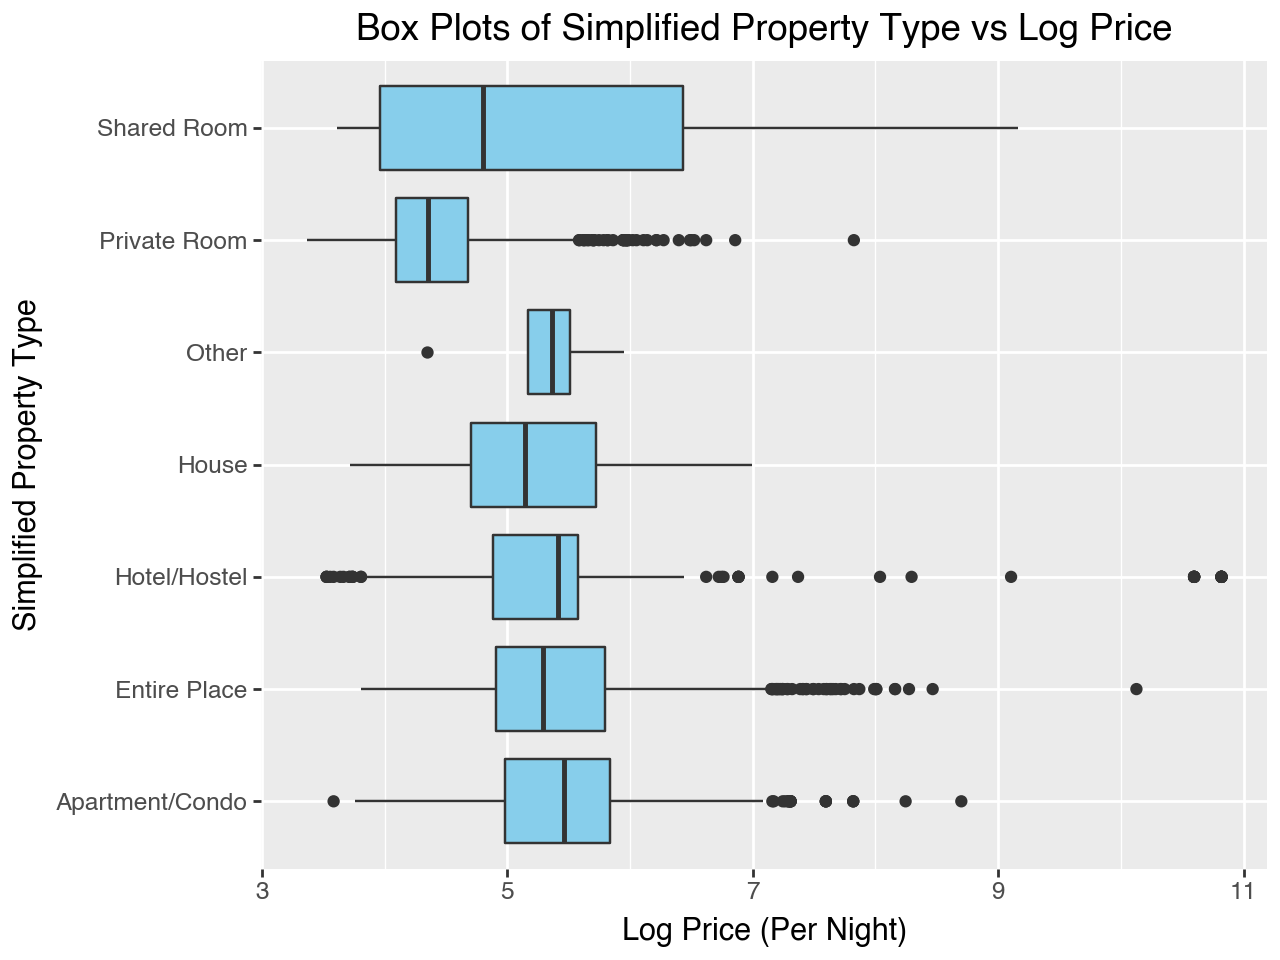

In [51]:
(
    ggplot(df, aes(x='property_type_simple', y='log_price')) +
    geom_boxplot(fill="skyblue") +
    coord_flip() +
    labs(
        title = "Box Plots of Simplified Property Type vs Log Price",
        x = "Simplified Property Type",
        y = "Log Price (Per Night)"
    )
)

In [52]:
# simplified categories

pd.DataFrame({"Count": df.groupby("property_type_simple")["price"].count(),
              "Mean Price": df.groupby("property_type_simple")["price"].mean(),
             "Median Price": df.groupby("property_type_simple")["price"].median()})

,Count,Mean Price,Median Price
property_type_simple,,,
Apartment/Condo,935,324.344385,235.0
Entire Place,2796,296.266452,199.0
Hotel/Hostel,680,1313.760294,225.0
House,158,241.335443,171.0
Other,5,219.400000,214.0
Private Room,1217,100.092030,78.0
Shared Room,4,2461.500000,154.5


In [53]:
# all categories

pd.DataFrame({"Count": df.groupby("property_type")["price"].count(),
              "Mean Price": df.groupby("property_type")["price"].mean(),
             "Median Price": df.groupby("property_type")["price"].median()})

,Count,Mean Price,Median Price
property_type,,,
Campsite,1,383.000000,383.0
Casa particular,1,248.000000,248.0
Cycladic home,1,214.000000,214.0
Entire bungalow,3,368.000000,407.0
Entire cabin,1,126.000000,126.0
Entire condo,682,370.439883,275.0
Entire cottage,11,192.727273,195.0
Entire guest suite,415,167.633735,153.0
Entire guesthouse,64,193.281250,154.5


### Room Type

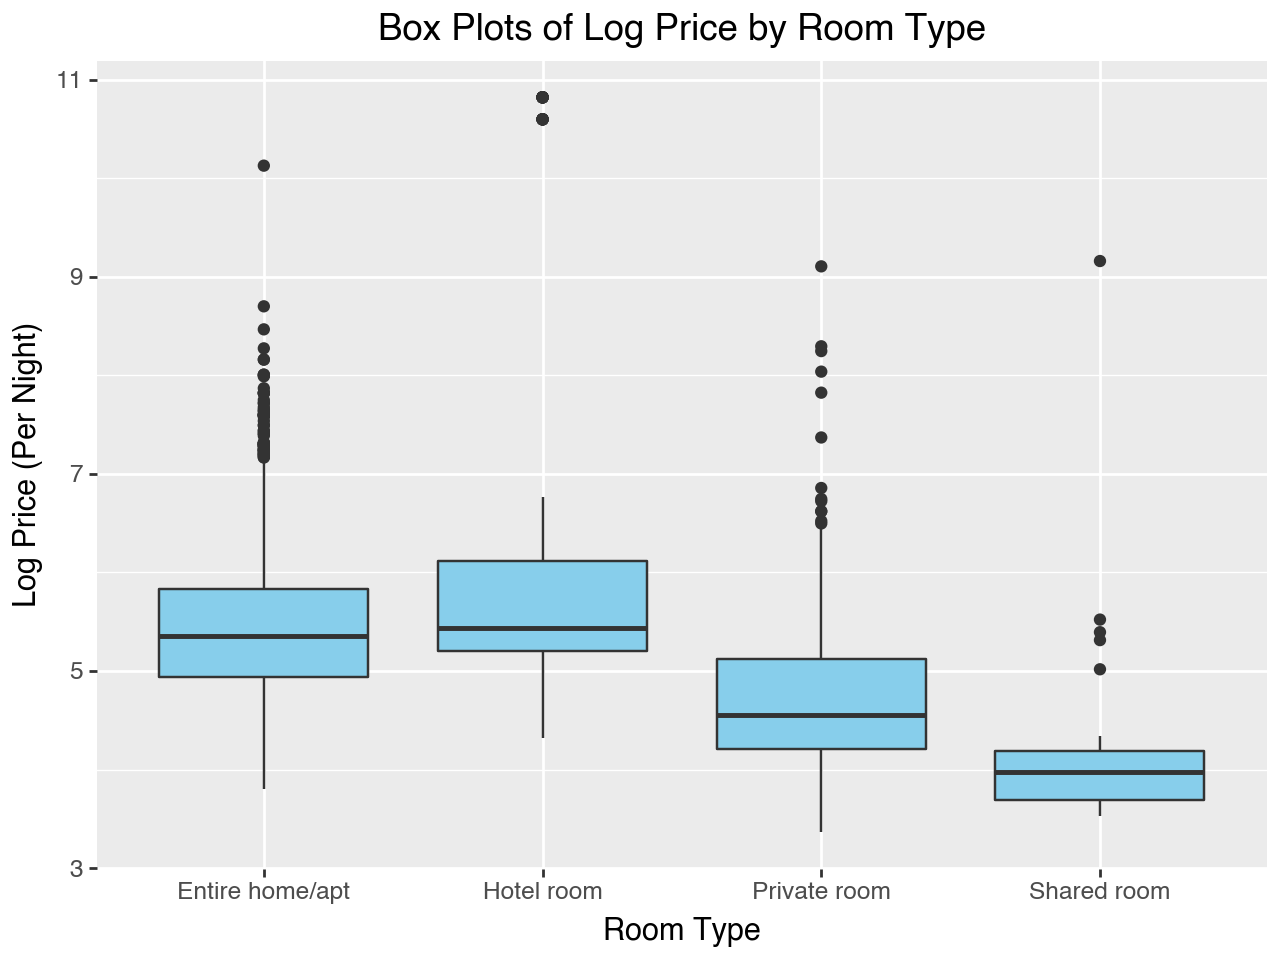

In [55]:
(
    ggplot(df, mapping = aes(x = "room_type", y = "log_price")) +
    geom_boxplot(fill = "skyblue") +
    labs(
        title = "Box Plots of Log Price by Room Type",
        x = "Room Type",
        y = "Log Price (Per Night)"
    )
)

In [56]:
pd.DataFrame({"Count": df.groupby("room_type")["price"].count(),
              "Mean Price": df.groupby("room_type")["price"].mean(),
             "Median Price": df.groupby("room_type")["price"].median()})

,Count,Mean Price,Median Price
room_type,,,
Entire home/apt,3761,308.339537,212.0
Hotel room,79,9434.075949,229.0
Private room,1928,144.976141,95.0
Shared room,27,422.037037,53.0


### Geographic Patterns

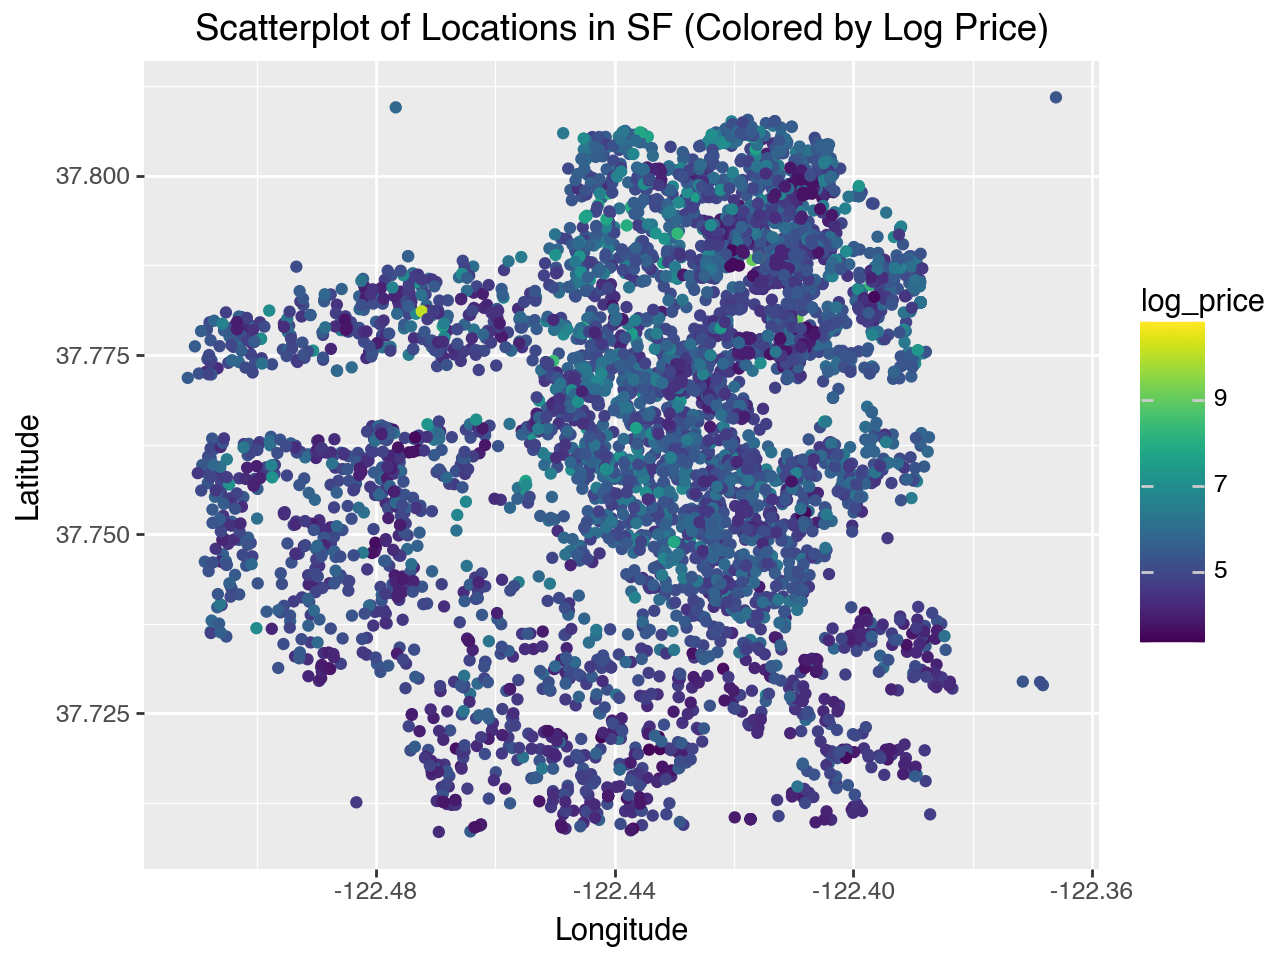

In [58]:
# Examining the relationship between price and location

(
    ggplot(df, mapping = aes(x = "longitude", y = "latitude", color = "log_price")) +
    geom_point() +
    labs(
        title = "Scatterplot of Locations in SF (Colored by Log Price)",
        x = "Longitude",
        y = "Latitude"
    )
)

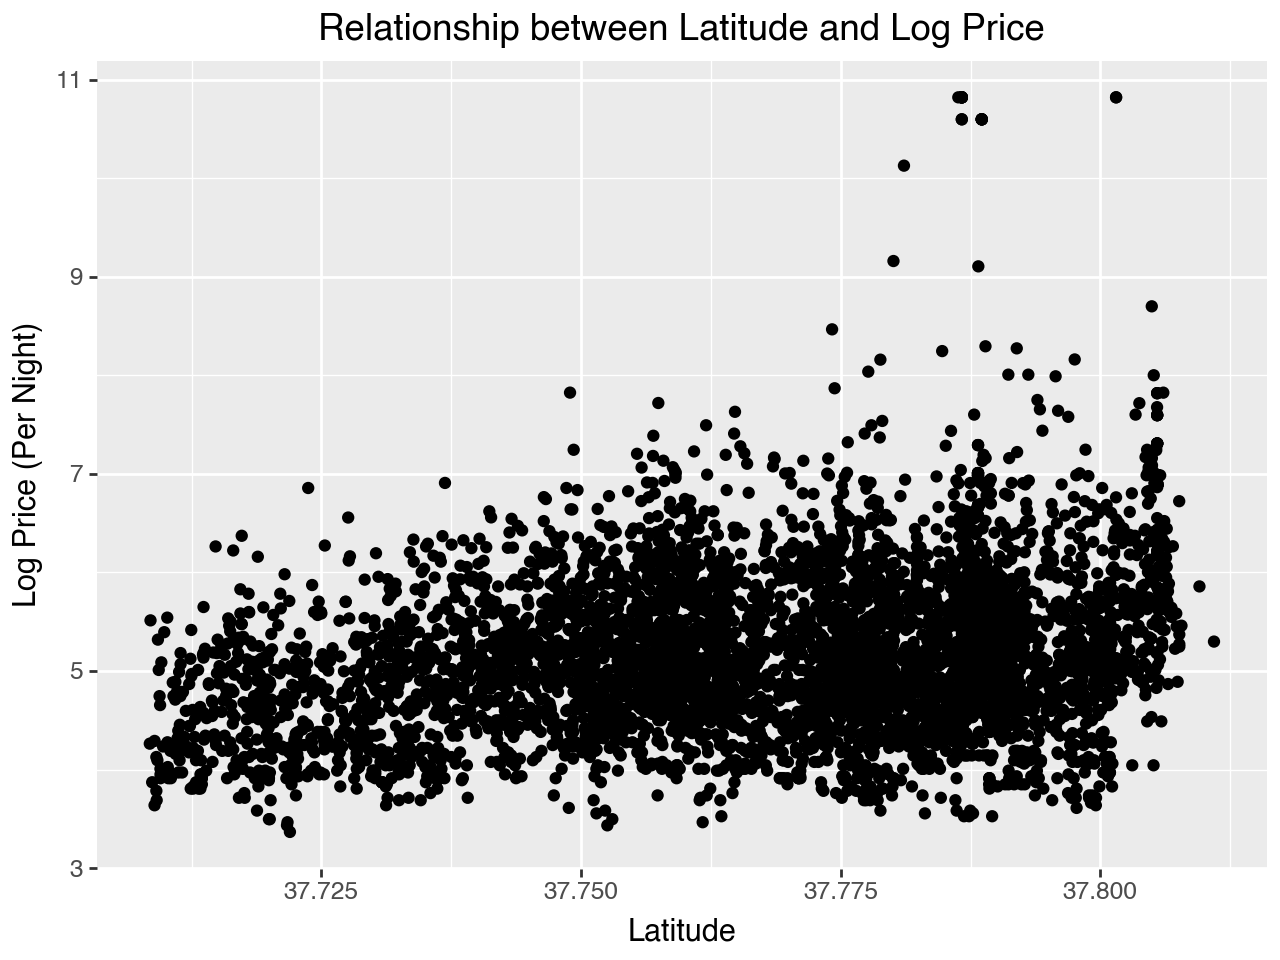

In [59]:
(
    ggplot(df, mapping = aes(x = "latitude", y = "log_price")) +
    geom_point() +
    labs(
        title = "Relationship between Latitude and Log Price",
        x = "Latitude",
        y = "Log Price (Per Night)"
    )
)

### Neighborhood

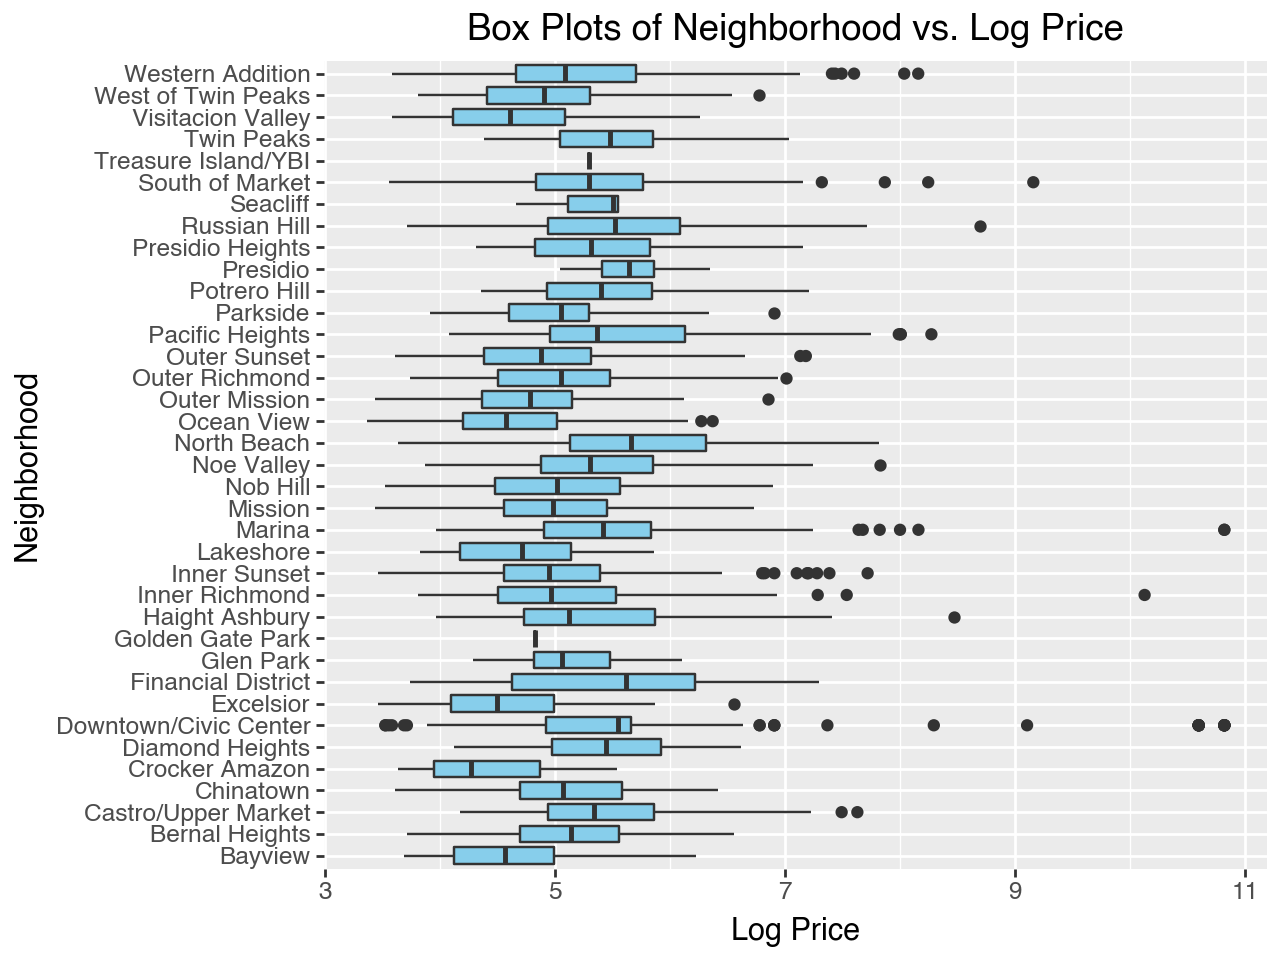

In [61]:
(
    ggplot(df, mapping = aes(x = "neighbourhood_cleansed", y = "log_price")) +
    geom_boxplot(fill = "skyblue") +
    coord_flip() +
    labs(
        title = "Box Plots of Neighborhood vs. Log Price",
        x = "Neighborhood",
        y = "Log Price"
    )
)

In [62]:
pd.DataFrame({"Count": df.groupby("neighbourhood_cleansed")["price"].count(),
              "Mean Price": df.groupby("neighbourhood_cleansed")["price"].mean(),
             "Median Price": df.groupby("neighbourhood_cleansed")["price"].median()}).sort_values("Count", ascending = False)

,Count,Mean Price,Median Price
neighbourhood_cleansed,,,
Downtown/Civic Center,755,1081.100662,256.0
South of Market,467,276.963597,200.0
Western Addition,411,261.462287,162.0
Mission,400,192.740000,146.0
Outer Sunset,286,168.272727,131.0
Nob Hill,250,191.228000,151.0
Castro/Upper Market,233,304.158798,209.0
Marina,203,821.793103,225.0
Bernal Heights,192,210.796875,170.5


## 6. Correlations

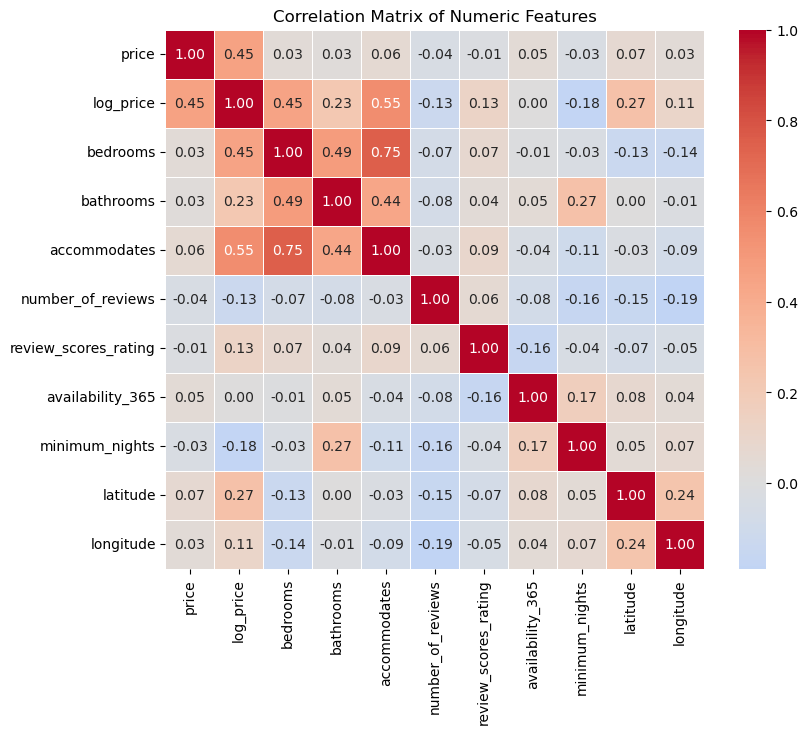

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['price', 'log_price', 'bedrooms', 'bathrooms', 
                'accommodates', 'number_of_reviews', 'review_scores_rating',
                'availability_365', 'minimum_nights', 'latitude', 'longitude']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 7. Key Insights

### Log Transformation is Necessary

The correlation plot demonstrates that the log transformation of price is necessary. The correlations between all numeric columns and price are very weak, the highest being 0.07, while the correlations between the numeric variables and log price are much more significant.

**Example**
- Correlation between price and bedrooms = 0.03
- Correlation between log price and bedrooms = 0.45


### Strongest Predictors of Log-Price

The strongest predictors of log-price from the correlation matrix are:
1. Accommodates (0.55)
2. Bedrooms (0.45)
3. Latitude (0.27)
4. Bathrooms (0.23)


### Multicollinearity Concerns

Bedrooms and Accommodates are highly correlated (0.75). This makes sense because the more bedrooms a property has, the more people it can accommodate. One of these features may need to be dropped, or they should be combined into a ratio or some sort. 


### Other Notable Patterns
- Inverse relationships between log-price and number of reviews (-0.13). This means that listings with less reviews tend to cost more, which makes sense because more expensive listings get fewer bookings.
- Inverse relationship between log-price and minimum nights (-0.18). This suggests that listings with higher minimum night requirements tend to have lower prices. This is because staying more nights will typically be more expensive and to stay competitive, the price must be a bit lower.


### Price Distribution
**(all values measured in USD per night)**
- Median = $170.00
  
- Mean = $378.92 (pulled up by high outliers)

- Min = $29.00

- Max = $50,000.00

- Standard Deviation = $2,440.02